# Assignment 6 (10 Points): Models

## Code written in R

In [1]:
library(tidyverse)
library(modelr)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'modelr' was built under R version 3.6.2"

### Q1 (5 points): Reproduce the following outcome by regressing ```Petal.Length``` on ```Petal.Width``` using the ```iris``` dataset and the following commands:

```
group_by, nest, mutate, map, function, broom::tidy, lm, unnest, select
```

In [2]:
iris %>% group_by(Species) %>% nest()%>%
    mutate(term = map(map(data, function(df){lm(Petal.Length ~ Petal.Width, data = df)}), broom::tidy))%>%
    unnest(term)%>%
    select(-(data))

Species,term,estimate,std.error,statistic,p.value
setosa,(Intercept),1.3275634,0.0599594,22.141037,7.676120e-27
setosa,Petal.Width,0.5464903,0.2243924,2.435422,1.863892e-02
versicolor,(Intercept),1.7812754,0.2838234,6.276000,9.484134e-08
versicolor,Petal.Width,1.8693247,0.2117495,8.827999,1.271916e-11
virginica,(Intercept),4.2406526,0.5612870,7.555230,1.041600e-09
virginica,Petal.Width,0.6472593,0.2745804,2.357267,2.253577e-02


### Q2 (5 points): Reproduce the following figure by regressing ```Petal.Length``` on ```Petal.Width``` using the ```iris``` dataset and the following commands:

```
group_by, nest, mutate, map, function, add_predictions, lm, unnest, select, ggplot, geom_point, aes, color, geom_line
```

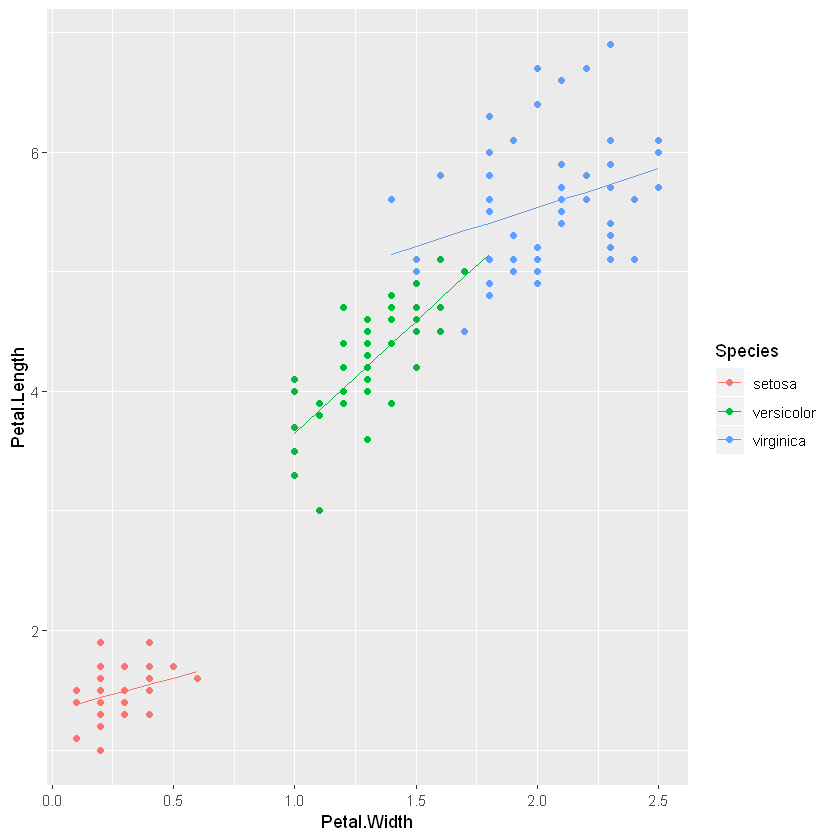

In [3]:
iris <- iris %>% group_by(Species)

model <- lm(Petal.Length ~ Petal.Width * Species, data = iris)

grid <- iris %>% data_grid(Petal.Width, Petal.Length) %>%
        add_predictions(model, 'Petal.Length')

ggplot(iris, aes(Petal.Width, Petal.Length, color = Species)) +
        geom_point() +
        geom_line(data = grid)